In [1]:
import pandas as pd
import numpy as np

In [2]:
# сообщаем Jupyter Notebook'у, что мы хотим получать визуализации прямо тут
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns # надстройка на mathplotlib с более простым синтаксисом. Более красивые графики

In [3]:
sns.set(rc={'figure.figsize': (9, 6)}) # делаем график побольше

In [4]:
events_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/event_data_train.zip') 
# события, которые происходят на курсе (сырые. У нас нет готовых фичей для исследования, нет группировок и разделений)

submissions_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/submissions_data_train.zip') 
# в другой более подробные данные, которые отвечают, за то, как пользователь пытается решать практическую задачу
events_data.head(15)

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632
5,32811,1434340895,passed,17632
6,32929,1434340921,discovered,17632
7,32929,1434340921,viewed,17632
8,32929,1434340939,started_attempt,17632
9,32929,1434340944,passed,17632


In [5]:
# самая первая задача - убедиться что данные правильные и валидные. Содержут те наблюдения, которые должны содержать. 
# И не содержат. которые не должны содержть

In [6]:
events_data.action.unique() # посмотрим какие у нас есть варианты события

array(['viewed', 'passed', 'discovered', 'started_attempt'], dtype=object)

In [7]:
# переведем timestamp в человекопонятную дату
events_data['date'] = pd.to_datetime(events_data.timestamp, unit='s')
events_data

,step_id,timestamp,action,user_id,date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35
...,...,...,...,...,...
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30


In [8]:
# построим график активности студентов по дням
events_data['day'] = events_data.date.dt.date
events_data

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15
...,...,...,...,...,...,...
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19


In [9]:
events_data.groupby('day').user_id.nunique() # количество уникальных пользователей в день

day
2015-06-15    705
2015-06-16    526
2015-06-17    440
2015-06-18    411
2015-06-19    377
             ... 
2018-05-15    145
2018-05-16    155
2018-05-17    165
2018-05-18    126
2018-05-19    131
Name: user_id, Length: 1070, dtype: int64

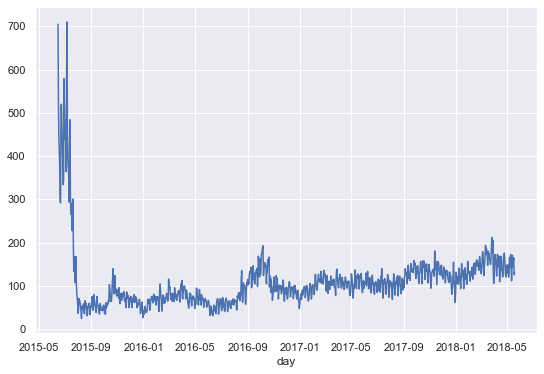

In [10]:
events_data.groupby('day').user_id.nunique().plot() # видим динамику активных пользователей по дням

In [11]:
# можно увидеть некую историю данных:
# сразу после старта записалось много человек, затем дедлайн закончился, и начала записываться новая волна.
# популярность курса растет со временем
# Нет всплесков. Нет выбросов. Нет потериданных. Можем использовать для ML

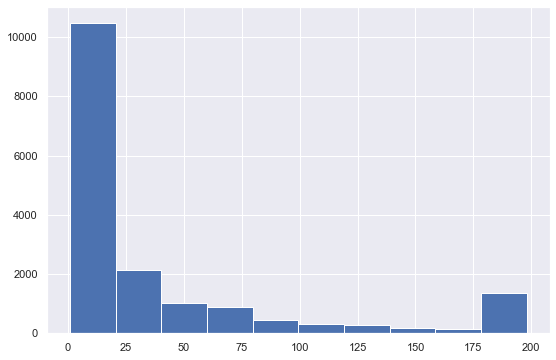

In [12]:
# посмотрим как распределены пользователи по колличеству баллов, которые они набрали за курс.
events_data[events_data.action == 'passed'] \
.groupby('user_id', as_index=False) \
.agg({'step_id': 'count'}) \
.rename(columns={'step_id': 'passed_steps'}).passed_steps.hist()

In [13]:
# В начале курса решали много, но потом количество пройденных степов все снижалось.
# В конце - те пользователи которые нарешали на сертификат

# НО У НАС ЕСТЬ ОШИБКА! Пользователи, у которых нет ни одного passed стэпа вообще не попадут в результат

In [14]:
# дата сейентист должен быть аккуратен на каждом шаге. Одна неточность приведет к неправильному предсказанию.
# ошибка не будет синтаксической. Мы ее не заметим. Но модель будет неправильной.
# Можно на каждом этапе считать кол-во уникальных пользователей, чтобы проверить, что оно не изменилось и мы никого не потеряли.

In [15]:
events_data[events_data.action == 'passed'] \
.groupby('user_id', as_index=False) \
.agg({'step_id': 'count'}) \
.rename(columns={'step_id': 'passed_steps'}).passed_steps.min() 
# 1, а не 0 -> выкинули пользователей, которые не прошли ни одного степа

1

In [16]:
# забываем это неправильно решение.

In [17]:
events_data.pivot_table(index='user_id', 
                        columns='action', 
                        values='step_id', 
                        aggfunc='count', 
                        fill_value=0) 
# pivot_table() принимает на вход index='iser_id' какую колонку мы будем использовать по индексам (в данном случае iser_id)
# columns='action' какие колонки являются колонками
# values='step_id' с какими значениями мы будем делать агрегационную функцию

action,discovered,passed,started_attempt,viewed
user_id,,,,
1,1,0,0,1
2,9,9,2,10
3,91,87,30,192
5,11,11,4,12
7,1,1,0,1
...,...,...,...,...
26790,8,8,1,9
26793,1,0,1,1
26794,69,69,34,180


In [18]:
# для каждого юзера есть степы, которые были изучены\пройдены\просмотрены и тд

In [19]:
# получили сложную структуру индекса.
events_data.pivot_table(index='user_id', 
                        columns='action', 
                        values='step_id', 
                        aggfunc='count', 
                        fill_value=0).reset_index()

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1
...,...,...,...,...,...
19229,26790,8,8,1,9
19230,26793,1,0,1,1
19231,26794,69,69,34,180
19232,26797,10,10,2,13


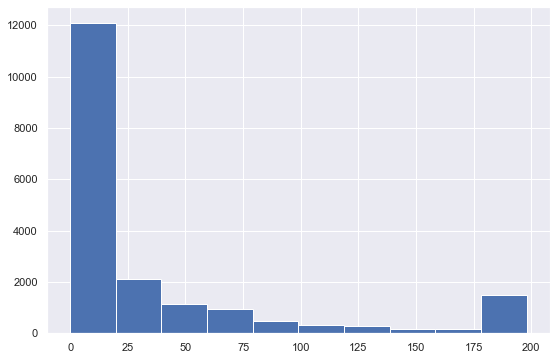

In [20]:
events_data.pivot_table(index='user_id', 
                        columns='action', 
                        values='step_id', 
                        aggfunc='count', 
                        fill_value=0).reset_index().discovered.hist() 
# более честное распределение юзеров (не потеряли не прошедших ни одного степа)

In [21]:
submissions_data

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853
...,...,...,...,...
509099,120745,1501946959,wrong,2615
509100,120745,1503059927,correct,13177
509101,120745,1506348153,wrong,15253
509102,120745,1523035316,wrong,1424


In [22]:
submissions_data['date'] = pd.to_datetime(submissions_data.timestamp, unit='s')
submissions_data

,step_id,timestamp,submission_status,user_id,date
0,31971,1434349275,correct,15853,2015-06-15 06:21:15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49
3,31972,1478852164,correct,15853,2016-11-11 08:16:04
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03
...,...,...,...,...,...
509099,120745,1501946959,wrong,2615,2017-08-05 15:29:19
509100,120745,1503059927,correct,13177,2017-08-18 12:38:47
509101,120745,1506348153,wrong,15253,2017-09-25 14:02:33
509102,120745,1523035316,wrong,1424,2018-04-06 17:21:56


In [23]:
submissions_data['day'] = submissions_data.date.dt.date
submissions_data

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15
...,...,...,...,...,...,...
509099,120745,1501946959,wrong,2615,2017-08-05 15:29:19,2017-08-05
509100,120745,1503059927,correct,13177,2017-08-18 12:38:47,2017-08-18
509101,120745,1506348153,wrong,15253,2017-09-25 14:02:33,2017-09-25
509102,120745,1523035316,wrong,1424,2018-04-06 17:21:56,2018-04-06


In [24]:
users_score = submissions_data.pivot_table(index='user_id', 
                        columns='submission_status', 
                        values='step_id', 
                        aggfunc='count', 
                        fill_value=0).reset_index()
users_score # для каждого юзера получили сколько у него было правильных и неправильных попыток

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1
...,...,...,...
9935,26787,3,0
9936,26790,1,0
9937,26794,33,9
9938,26797,2,0


In [25]:
# посчитаем для каждого пользователя сколько он прошел уникальных степов, сколько он отправил 
# правильных\неправильных сабмитов (решений), сколько уникальных дней он учился на степике.

# Посмотрим различаются ли эти показатели у тех кто успешно закончил курс и у тех, кто курс бросили.

In [26]:
# Как понять, что пользователь бросил курс? Мб можно подождать и пользователь продолжит выполнение?

In [27]:
# Категории: 1 - прошли курс (получили сертификат), 2 - бросили и не вернутся, 3 - юзеры, которые в процессе

In [28]:
# Если пользователь не заходил на платформу месяц - будет считать его дропнувшимся. Очень хочется, чтобы такая 
# эвристика имела под собой data-driven основу. 

# Какие перерывы между сабмитами у участников нашего курса? Если пользователь не появляется на нашем курсе 
# больше N дней, то с вероятностью 95% будем считать его дропнувшимся. Варирую эту модель можно получать более жесткие\мягкие
# классификаторы. Это поможет отвечать на вопрос глобальнее.

In [29]:
# Может быть, это стратегия? Записаться на курс, отсутствовать 2 недели, а потом вернуться и проходить?
# На этот вопрос отвечать лучше всего опираясь на данные а не на эвристику

In [30]:
# Идеально было бы рассчитать для каждого пользователя какие у него были промежутки между днями, когда он решал курс.
# Далее посмотреть на картину по всем пользователям и принять статистическое решение.

In [31]:
# Какой временной промежуток отсутствия на курсе можно считать пороговым, после которого мы будем относить 
# пользователя к категории дропнувшихся?

In [32]:
# оставим только нужные данные. Какие перерывы в днях наблюдаются в момент прохождения курса?
events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day']) # ПОЛЕЗНАЯ ФУНКЦИЯ Удаляет дубликаты
# Удалим дубликаты в паре 'user_id', 'day' - оставим только одну строку для 1 юзера для каждого дня, когда он был онлайн
# В день может быть много событий, но нам нужно только одно. чтоб записать его как активного

,user_id,day,timestamp
0,17632,2015-06-15,1434340848
36,12494,2015-06-15,1434341931
59,442,2015-06-15,1434342029
62,22254,2015-06-15,1434342042
94,6646,2015-06-15,1434342230
...,...,...,...
3480298,364,2018-05-19,1526762223
3480329,22851,2018-05-19,1526762629
3480333,943,2018-05-19,1526762664
3480669,26659,2018-05-19,1526770439


In [33]:
# соберем все timestamp и посмотрим, какие были перерывы
events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day']).groupby('user_id')['timestamp'] \
.apply(list)
# для каждого пользователя отберем и сохраним в список уникальные timestamp

user_id
1                                             [1472827464]
2                                 [1514383364, 1519226966]
3        [1434358476, 1441257725, 1441440209, 144153391...
5                                 [1466156809, 1499859621]
7                                             [1521634660]
                               ...                        
26790     [1451484016, 1451722241, 1452616205, 1517495853]
26793                                         [1510225031]
26794    [1495287049, 1495373177, 1495509936, 149560483...
26797                             [1508425316, 1509993306]
26798                                         [1520975763]
Name: timestamp, Length: 19234, dtype: object

In [34]:
np.diff([1,2,5]) # вернет разницу между значениями

array([1, 3])

In [35]:
events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day']).groupby('user_id')['timestamp'] \
.apply(list).apply(np.diff) # np.diff считает разность между ближайшими днями активности.

user_id
1                                                       []
2                                                [4843602]
3         [6899249, 182484, 93710, 2768870, 171400, 78712]
5                                               [33702812]
7                                                       []
                               ...                        
26790                           [238225, 893964, 64879648]
26793                                                   []
26794    [86128, 136759, 94899, 1422583, 14347289, 5050...
26797                                            [1567990]
26798                                                   []
Name: timestamp, Length: 19234, dtype: object

In [36]:
gap_data = events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day']).groupby('user_id')['timestamp'] \
.apply(list).apply(np.diff).values
gap_data

array([array([], dtype=int32), array([4843602]),
       array([6899249,  182484,   93710, 2768870,  171400,   78712]), ...,
       array([   86128,   136759,    94899,  1422583, 14347289,   505061,
          98252,    57019]),
       array([1567990]), array([], dtype=int32)], dtype=object)

In [37]:
gap_data = pd.Series(np.concatenate(gap_data, axis=0)) # получили одномерный массив из двумерного
gap_data = gap_data / (24 * 60 * 60) # значения разницы в днях, между двумя заходами на курс в разные дни

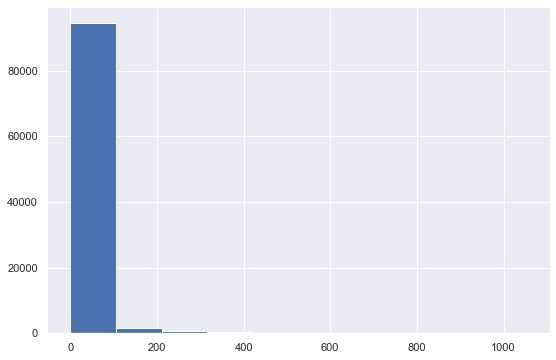

In [38]:
gap_data.hist() # в реальных данных редко мы можем вызвать сразу какой-либо график и получить понятную картинку

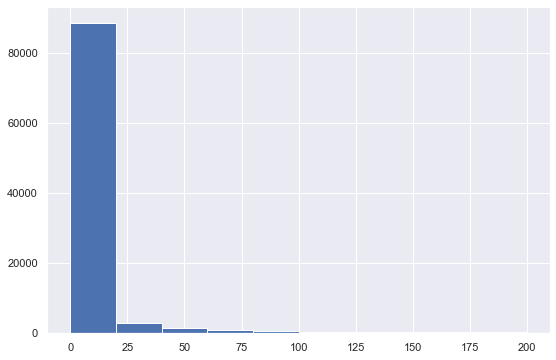

In [39]:
gap_data[gap_data < 200].hist()

In [40]:
# Большинство перерывов между заходами - от 0 до 25 дней. Посчитаем точнее

In [41]:
gap_data.quantile(0.95)

59.760440972222156

In [42]:
# Только 5% пользователей возвращается после перерыва в 2 месяца

In [43]:
gap_data.quantile(0.9) # менее строгая оценка - 18 дней

18.325995370370403

In [44]:
# Эти данные уже можно использовать для разметки выборки, проверки гипотез

In [45]:
# Введите id Анатолия Карпова, под которым он фигурирует в данных events_data_train и submissions_data_train.

In [46]:
events_data

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15
...,...,...,...,...,...,...
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19


In [47]:
# Мое решение
#pd.DataFrame(events_data[['user_id', 'day', 'timestamp']].
#             drop_duplicates(subset=['user_id', 'day']).
#             groupby('user_id')['timestamp'].
#             count()).query("timestamp > 300")


In [48]:
# id пользователя, который провел на курсе больше всего дней - Анатолий Карпов
events_data.groupby('user_id')['day'].nunique().idxmax()

1046

In [49]:
# Разметим пользователей по принципу того ушли они с курса или нет. Если пользователь прошел курс, 
# то он не является дропнувшимся

In [50]:
# Рассчитаем для каждого пользователя его последнее время появления на курсе
users_data = events_data.groupby('user_id', as_index=False).agg({'timestamp': 'max'}).rename(columns={'timestamp': 'last_timestamp'})
users_data # тут будем хранить подготовленные фичи

,user_id,last_timestamp
0,1,1472827464
1,2,1519226966
2,3,1444581588
3,5,1499859939
4,7,1521634660
...,...,...
19229,26790,1517495987
19230,26793,1510225034
19231,26794,1512035039
19232,26797,1509995096


In [51]:
# Нас интересует правда ли, что последний timestamp больше, чем заведеное нами значени (30 дней)
# текущий день 2018-05-19
30 * 24 * 60 * 60 # месяц

2592000

In [52]:
now = 1526772811 # текущий день 2018-05-19
drop_out_treshhold = 30 * 24 * 60 * 60 # месяц 

In [53]:
users_data['is_gone_user'] = (now - users_data.last_timestamp) > drop_out_treshhold
users_data # обернем это значени в 1 или 0 в зависимости, больше ли это значение, чем наше пороговое или нет

,user_id,last_timestamp,is_gone_user
0,1,1472827464,True
1,2,1519226966,True
2,3,1444581588,True
3,5,1499859939,True
4,7,1521634660,True
...,...,...,...
19229,26790,1517495987,True
19230,26793,1510225034,True
19231,26794,1512035039,True
19232,26797,1509995096,True


In [54]:
# is_gone_user ушел ли пользователь с курса, или же нет. Нужно добавить условие, что эти
# пользователи не прошли курс, а бросили его

# примерджим к этой балице число попыток успещных\неуспешных и число набранных баллов

In [55]:
users_score.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


In [56]:
users_data.merge(users_score).head() # НЕ ПРАВИЛЬНЫЙ ВАРИАНТ - потеряли данные

# есть outer и inner joiner. (по умолчанию - иннер).
# Инеер означает, что мы возьмем все user_id, из двух датафреймов и сделаем пересечение, а всех, которые не совпали - выкинем

,user_id,last_timestamp,is_gone_user,correct,wrong
0,2,1519226966,True,2,0
1,3,1444581588,True,29,23
2,5,1499859939,True,2,2
3,8,1481466913,True,9,21
4,14,1436368676,True,0,1


In [57]:
users_data.merge(users_score, how='outer').head() 
# если данных нет в одной из таблиц, то они все равно будут в результирующей (заполнятся NaN)                     ВАЖНО!!!

,user_id,last_timestamp,is_gone_user,correct,wrong
0,1,1472827464,True,NaN,NaN
1,2,1519226966,True,2.0,0.0
2,3,1444581588,True,29.0,23.0
3,5,1499859939,True,2.0,2.0
4,7,1521634660,True,NaN,NaN


In [58]:
# Если дераем merge и не указываем ключ, то пандас автоматом ищем колонку с одинаковым названием. Можем описать более точно,
# по какой еолонке мы хотим мержиться
users_data = users_data.merge(users_score, on='user_id', how='outer')
users_data

,user_id,last_timestamp,is_gone_user,correct,wrong
0,1,1472827464,True,NaN,NaN
1,2,1519226966,True,2.0,0.0
2,3,1444581588,True,29.0,23.0
3,5,1499859939,True,2.0,2.0
4,7,1521634660,True,NaN,NaN
...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0
19230,26793,1510225034,True,NaN,NaN
19231,26794,1512035039,True,33.0,9.0
19232,26797,1509995096,True,2.0,0.0


In [59]:
users_data = users_data.fillna(0) # заполним NaN нулями
users_data

,user_id,last_timestamp,is_gone_user,correct,wrong
0,1,1472827464,True,0.0,0.0
1,2,1519226966,True,2.0,0.0
2,3,1444581588,True,29.0,23.0
3,5,1499859939,True,2.0,2.0
4,7,1521634660,True,0.0,0.0
...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0
19230,26793,1510225034,True,0.0,0.0
19231,26794,1512035039,True,33.0,9.0
19232,26797,1509995096,True,2.0,0.0


In [60]:
users_events_data = events_data.pivot_table(index='user_id', 
                        columns='action', 
                        values='step_id', 
                        aggfunc='count', 
                        fill_value=0).reset_index()
# более честное распределение юзеров (не потеряли не прошедших ни одного степа)
users_events_data

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1
...,...,...,...,...,...
19229,26790,8,8,1,9
19230,26793,1,0,1,1
19231,26794,69,69,34,180
19232,26797,10,10,2,13


In [61]:
# users_data.merge(users_events_data, how='outer') 
# вначале проверяем без присваивания, чтобы не затереть исходные данные неправильными данными - если правильно - присваиваем

users_data = users_data.merge(users_events_data, how='outer') 
users_data

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed
0,1,1472827464,True,0.0,0.0,1,0,0,1
1,2,1519226966,True,2.0,0.0,9,9,2,10
2,3,1444581588,True,29.0,23.0,91,87,30,192
3,5,1499859939,True,2.0,2.0,11,11,4,12
4,7,1521634660,True,0.0,0.0,1,1,0,1
...,...,...,...,...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0,8,8,1,9
19230,26793,1510225034,True,0.0,0.0,1,0,1,1
19231,26794,1512035039,True,33.0,9.0,69,69,34,180
19232,26797,1509995096,True,2.0,0.0,10,10,2,13


In [62]:
# Получили агрегированную статистику. Ушел юзер или нет, время последнего посещения, кол-ва правильных\неправильных сабмитов,
# кол-во изученных\пройденных\начатых к прохождению\просмотренных.

# Не хватает еще одной очень важной фичи: сколько уникальных дней наш пользователь заходил. Добавим ее

In [63]:
users_days = events_data.groupby('user_id').day.nunique()
users_days # получили серию

user_id
1        1
2        2
3        7
5        2
7        1
        ..
26790    4
26793    1
26794    9
26797    2
26798    1
Name: day, Length: 19234, dtype: int64

In [64]:
users_days = users_days.to_frame().reset_index() # перевели в датафрейм .reset_index() - чтобы не поплыли индексы
users_days

,user_id,day
0,1,1
1,2,2
2,3,7
3,5,2
4,7,1
...,...,...
19229,26790,4
19230,26793,1
19231,26794,9
19232,26797,2


In [65]:
# замержим число уникальных дней посещения к нашей основной таблице

users_data = users_data.merge(users_days, how='outer')
users_data

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day
0,1,1472827464,True,0.0,0.0,1,0,0,1,1
1,2,1519226966,True,2.0,0.0,9,9,2,10,2
2,3,1444581588,True,29.0,23.0,91,87,30,192,7
3,5,1499859939,True,2.0,2.0,11,11,4,12,2
4,7,1521634660,True,0.0,0.0,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0,8,8,1,9,4
19230,26793,1510225034,True,0.0,0.0,1,0,1,1,1
19231,26794,1512035039,True,33.0,9.0,69,69,34,180,9
19232,26797,1509995096,True,2.0,0.0,10,10,2,13,2


In [66]:
# проверим, что никого не потеряли
users_data.user_id.nunique() # сколько сейчас юзеров

19234

In [67]:
# посмотрим, сколько юзеров было в сырых данных
events_data.user_id.nunique()

19234

In [68]:
# Ничего не потеряли. Введем последнюю колонку - правда ли, что юзер успешно закончил курс (набрал более 170 пройденных шагов)

In [69]:
users_data['passed_course'] = users_data.passed > 170
users_data

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_course
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False
...,...,...,...,...,...,...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0,8,8,1,9,4,False
19230,26793,1510225034,True,0.0,0.0,1,0,1,1,1,False
19231,26794,1512035039,True,33.0,9.0,69,69,34,180,9,False
19232,26797,1509995096,True,2.0,0.0,10,10,2,13,2,False


In [70]:
users_data.groupby('passed_course').count() # соотношение прошедших\непрошедших

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day
passed_course,,,,,,,,,,
False,17809,17809,17809,17809,17809,17809,17809,17809,17809,17809
True,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425


In [71]:
100 * 1425 / 17809 # 8% людей прошли курс

8.001572238755685

In [72]:
# Теперь нам нужно научиться предсказывать, что пользователь отвалится\не отвалится по первой его неделе, на основе 
# полного набора поведения. Ведь когда он отвалился - уже поздно. И если мы найдем взаимосвязь поведения и ухода с 
# курса, мы можем стимулировать таких пользователей не покидать курс дополнительно, чтобы они остались.

# Основная задача - предсказывать дропнутость как можно быстрее, на основании как можно меньшего набора данных.

# Продолжение после 2.7-practice

In [73]:
users_data

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_course
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False
...,...,...,...,...,...,...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0,8,8,1,9,4,False
19230,26793,1510225034,True,0.0,0.0,1,0,1,1,1,False
19231,26794,1512035039,True,33.0,9.0,69,69,34,180,9,False
19232,26797,1509995096,True,2.0,0.0,10,10,2,13,2,False


Попробуем предсказать уйдет ли пользователь с курсе по первым 3 дням

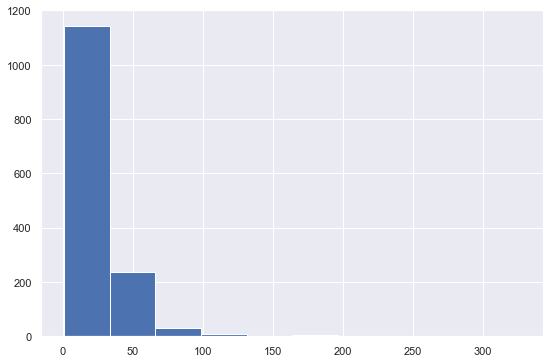

In [74]:
users_data[users_data.passed_course].day.hist()
# серия passed_course - bool, поэтому можно использовать как фильтр. Не совсем идеологично, но можно

В реальный задачах нормальные распределния встречаются редко

In [75]:
users_data[users_data.passed_course].day.median() # Большинство решает более 20 дней. 3 дня на предсказание - нормально

20.0

Отберем действия юзера за первые 3 дня

In [76]:
user_min_time = events_data.groupby('user_id', 
                                    as_index=False).agg({'timestamp': 'min'}).rename({'timestamp': 'min_timestamp'}, axis=1)
# когда пользователь зашел на курс в первые
users_data = users_data.merge(user_min_time, how='outer')

In [77]:
users_data

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_course,min_timestamp
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False,1472827464
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False,1514383364
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False,1434358476
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False,1466156809
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False,1521634660
...,...,...,...,...,...,...,...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0,8,8,1,9,4,False,1451484016
19230,26793,1510225034,True,0.0,0.0,1,0,1,1,1,False,1510225031
19231,26794,1512035039,True,33.0,9.0,69,69,34,180,9,False,1495287049
19232,26797,1509995096,True,2.0,0.0,10,10,2,13,2,False,1508425316


In [78]:
user_min_time

,user_id,min_timestamp
0,1,1472827464
1,2,1514383364
2,3,1434358476
3,5,1466156809
4,7,1521634660
...,...,...
19229,26790,1451484016
19230,26793,1510225031
19231,26794,1495287049
19232,26797,1508425316


неправильный способ отобрать данные - писать цикл for, в них проверки и тд. Это не pandas-way. Все делается одной командой.

In [79]:
# скомбинируем user_id и timestamp
events_data['user_time'] = events_data.user_id.map(str) + '_' + events_data.timestamp.map(str) 
# приветем юзера и время к строке и сложим. Операция почти бесплатна


In [80]:
events_data

,step_id,timestamp,action,user_id,date,day,user_time
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895
...,...,...,...,...,...,...,...
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19,11677_1526772685
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19,5198_1526772750
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19,5198_1526772750
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19,5198_1526772750


In [81]:
learning_time_threshold = 3 * 24 * 60 * 60

In [82]:
user_learning_time_threshold = user_min_time.user_id.map(str) +  \
'_' + (user_min_time.min_timestamp + learning_time_threshold).map(str)

In [83]:
user_learning_time_threshold 
# серия, где для каждого юзера максимальное время, после которого идут те данные, которые нам не нужны

0            1_1473086664
1            2_1514642564
2            3_1434617676
3            5_1466416009
4            7_1521893860
               ...       
19229    26790_1451743216
19230    26793_1510484231
19231    26794_1495546249
19232    26797_1508684516
19233    26798_1521234963
Length: 19234, dtype: object

In [84]:
user_min_time['user_learning_time_threshold'] = user_learning_time_threshold

In [85]:
events_data = events_data.merge(user_min_time[['user_id', 'user_learning_time_threshold']], how='outer')
events_data

,step_id,timestamp,action,user_id,date,day,user_time,user_learning_time_threshold
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,17632_1434600048
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,17632_1434600048
...,...,...,...,...,...,...,...,...
3480698,32814,1526762783,discovered,943,2018-05-19 20:46:23,2018-05-19,943_1526762783,943_1527021864
3480699,32814,1526762783,passed,943,2018-05-19 20:46:23,2018-05-19,943_1526762783,943_1527021864
3480700,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19,5198_1526772750,5198_1527031950
3480701,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19,5198_1526772750,5198_1527031950


In [86]:
# строки сравниваются как инты. Для того чтоб отобрать данные по порогу (оптимизированно):
events_data_train = events_data[events_data.user_time <= events_data.user_learning_time_threshold]
events_data_train # для каждого пользователя отобрали только те события, которые он сделал за первые 3 дня

,step_id,timestamp,action,user_id,date,day,user_time,user_learning_time_threshold
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,17632_1434600048
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,17632_1434600048
...,...,...,...,...,...,...,...,...
3480698,32814,1526762783,discovered,943,2018-05-19 20:46:23,2018-05-19,943_1526762783,943_1527021864
3480699,32814,1526762783,passed,943,2018-05-19 20:46:23,2018-05-19,943_1526762783,943_1527021864
3480700,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19,5198_1526772750,5198_1527031950
3480701,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19,5198_1526772750,5198_1527031950


Все фильтры стоит писать в одну команду с объединением. С помощью мержей и сравнения двух колонок. Но никак не в циклах.

In [87]:
events_data_train.groupby('user_id').day.nunique().max()

# наши данные действительно содержат нужную информацию. 4 - потому что день начала + 3 дня. Получим промежуток 4 дня.

4

In [88]:
submissions_data['users_time'] = submissions_data.user_id.map(str) + '_' + submissions_data.timestamp.map(str)
submissions_data = submissions_data.merge(user_min_time[['user_id', 'user_learning_time_threshold']], how='outer')
submissions_data_train = submissions_data[submissions_data.users_time <= submissions_data.user_learning_time_threshold]
submissions_data_train.groupby('user_id').day.nunique().max()

4

In [89]:
X = submissions_data_train.groupby('user_id').day.nunique().to_frame().reset_index()
X

,user_id,day
0,2,1
1,3,1
2,8,1
3,14,1
4,16,3
...,...,...
8908,26787,1
8909,26790,1
8910,26794,3
8911,26797,1


In [90]:
steps_tried = submissions_data_train.groupby('user_id').step_id.nunique() \
.to_frame().reset_index().rename(columns={'step_id':'steps_tried'})
steps_tried

,user_id,steps_tried
0,2,2
1,3,4
2,8,11
3,14,1
4,16,23
...,...,...
8908,26787,3
8909,26790,1
8910,26794,27
8911,26797,2


In [91]:
X = X.merge(steps_tried, on='user_id', how='outer')

In [92]:
X

,user_id,day,steps_tried
0,2,1,2
1,3,1,4
2,8,1,11
3,14,1,1
4,16,3,23
...,...,...,...
8908,26787,1,3
8909,26790,1,1
8910,26794,3,27
8911,26797,1,2


In [93]:
X = X.rename(columns={'day': 'days'})
X

,user_id,days,steps_tried
0,2,1,2
1,3,1,4
2,8,1,11
3,14,1,1
4,16,3,23
...,...,...,...
8908,26787,1,3
8909,26790,1,1
8910,26794,3,27
8911,26797,1,2


In [94]:
X = X.merge(submissions_data_train.pivot_table(index='user_id',
                                              columns='submission_status',
                                              values='step_id',
                                              aggfunc='count',
                                              fill_value=0).reset_index())
X

,user_id,days,steps_tried,correct,wrong
0,2,1,2,2,0
1,3,1,4,4,4
2,8,1,11,9,21
3,14,1,1,0,1
4,16,3,23,23,27
...,...,...,...,...,...
8908,26787,1,3,3,0
8909,26790,1,1,1,0
8910,26794,3,27,31,9
8911,26797,1,2,2,0


In [95]:
X['correct_ratio'] = X.correct / (X.correct + X.wrong)
X

,user_id,days,steps_tried,correct,wrong,correct_ratio
0,2,1,2,2,0,1.000000
1,3,1,4,4,4,0.500000
2,8,1,11,9,21,0.300000
3,14,1,1,0,1,0.000000
4,16,3,23,23,27,0.460000
...,...,...,...,...,...,...
8908,26787,1,3,3,0,1.000000
8909,26790,1,1,1,0,1.000000
8910,26794,3,27,31,9,0.775000
8911,26797,1,2,2,0,1.000000


In [96]:
X = X.merge(events_data_train.pivot_table(index='user_id',
                                              columns='action',
                                              values='step_id',
                                              aggfunc='count',
                                              fill_value=0).reset_index()[['user_id', 'viewed']], how='outer')
X

,user_id,days,steps_tried,correct,wrong,correct_ratio,viewed
0,2,1.0,2.0,2.0,0.0,1.00,9
1,3,1.0,4.0,4.0,4.0,0.50,20
2,8,1.0,11.0,9.0,21.0,0.30,154
3,14,1.0,1.0,0.0,1.0,0.00,9
4,16,3.0,23.0,23.0,27.0,0.46,132
...,...,...,...,...,...,...,...
19229,26774,NaN,NaN,NaN,NaN,NaN,1
19230,26781,NaN,NaN,NaN,NaN,NaN,6
19231,26788,NaN,NaN,NaN,NaN,NaN,1
19232,26789,NaN,NaN,NaN,NaN,NaN,2


In [97]:
X = X.fillna(0)

In [98]:
X = X.merge(users_data[['user_id', 'passed_course','is_gone_user']], how='outer')
X

,user_id,days,steps_tried,correct,wrong,correct_ratio,viewed,passed_course,is_gone_user
0,2,1.0,2.0,2.0,0.0,1.00,9,False,True
1,3,1.0,4.0,4.0,4.0,0.50,20,False,True
2,8,1.0,11.0,9.0,21.0,0.30,154,False,True
3,14,1.0,1.0,0.0,1.0,0.00,9,False,True
4,16,3.0,23.0,23.0,27.0,0.46,132,True,True
...,...,...,...,...,...,...,...,...,...
19229,26774,0.0,0.0,0.0,0.0,0.00,1,False,True
19230,26781,0.0,0.0,0.0,0.0,0.00,6,True,True
19231,26788,0.0,0.0,0.0,0.0,0.00,1,False,True
19232,26789,0.0,0.0,0.0,0.0,0.00,2,False,True


In [99]:
X = X[~((X.is_gone_user == False) & (X.passed_course == False))] # дошли до конца курса или бросили
X

,user_id,days,steps_tried,correct,wrong,correct_ratio,viewed,passed_course,is_gone_user
0,2,1.0,2.0,2.0,0.0,1.00,9,False,True
1,3,1.0,4.0,4.0,4.0,0.50,20,False,True
2,8,1.0,11.0,9.0,21.0,0.30,154,False,True
3,14,1.0,1.0,0.0,1.0,0.00,9,False,True
4,16,3.0,23.0,23.0,27.0,0.46,132,True,True
...,...,...,...,...,...,...,...,...,...
19229,26774,0.0,0.0,0.0,0.0,0.00,1,False,True
19230,26781,0.0,0.0,0.0,0.0,0.00,6,True,True
19231,26788,0.0,0.0,0.0,0.0,0.00,1,False,True
19232,26789,0.0,0.0,0.0,0.0,0.00,2,False,True


In [100]:
X.groupby(['passed_course', 'is_gone_user']).user_id.count()

passed_course  is_gone_user
False          True            16560
True           False             141
               True             1284
Name: user_id, dtype: int64

In [101]:
y = X.passed_course.map(int)
X = X.drop(['passed_course', 'is_gone_user'], axis=1)
X

,user_id,days,steps_tried,correct,wrong,correct_ratio,viewed
0,2,1.0,2.0,2.0,0.0,1.00,9
1,3,1.0,4.0,4.0,4.0,0.50,20
2,8,1.0,11.0,9.0,21.0,0.30,154
3,14,1.0,1.0,0.0,1.0,0.00,9
4,16,3.0,23.0,23.0,27.0,0.46,132
...,...,...,...,...,...,...,...
19229,26774,0.0,0.0,0.0,0.0,0.00,1
19230,26781,0.0,0.0,0.0,0.0,0.00,6
19231,26788,0.0,0.0,0.0,0.0,0.00,1
19232,26789,0.0,0.0,0.0,0.0,0.00,2


In [102]:
X = X.set_index(X.user_id)
X

,user_id,days,steps_tried,correct,wrong,correct_ratio,viewed
user_id,,,,,,,
2,2,1.0,2.0,2.0,0.0,1.00,9
3,3,1.0,4.0,4.0,4.0,0.50,20
8,8,1.0,11.0,9.0,21.0,0.30,154
14,14,1.0,1.0,0.0,1.0,0.00,9
16,16,3.0,23.0,23.0,27.0,0.46,132
...,...,...,...,...,...,...,...
26774,26774,0.0,0.0,0.0,0.0,0.00,1
26781,26781,0.0,0.0,0.0,0.0,0.00,6
26788,26788,0.0,0.0,0.0,0.0,0.00,1


In [103]:
X = X.drop(columns=['user_id'])
X

,days,steps_tried,correct,wrong,correct_ratio,viewed
user_id,,,,,,
2,1.0,2.0,2.0,0.0,1.00,9
3,1.0,4.0,4.0,4.0,0.50,20
8,1.0,11.0,9.0,21.0,0.30,154
14,1.0,1.0,0.0,1.0,0.00,9
16,3.0,23.0,23.0,27.0,0.46,132
...,...,...,...,...,...,...
26774,0.0,0.0,0.0,0.0,0.00,1
26781,0.0,0.0,0.0,0.0,0.00,6
26788,0.0,0.0,0.0,0.0,0.00,1


# Далее обучим модель